# Tutorial on Simple Visual Question Answering 

### Understandin the challenge

![](https://github.com/mateuszmalinowski/visual_turing_test-tutorial/raw/master/fig/challenges.jpg)

### Download DAQUAR dataset

In [1]:
! mkdir -p data/daquar
! wget -P data/daquar/ https://raw.githubusercontent.com/mateuszmalinowski/visual_turing_test-tutorial/master/data/daquar/qa.894.raw.test.format_triple
! wget -P data/daquar/ https://raw.githubusercontent.com/mateuszmalinowski/visual_turing_test-tutorial/master/data/daquar/qa.894.raw.train.format_triple
! wget -P data/daquar/ http://datasets.d2.mpi-inf.mpg.de/mateusz14visual-turing/nyu_depth_images.tar
! tar -xvf data/daquar/nyu_depth_images.tar -C data/daquar/
! mv data/daquar/nyu_depth_images data/daquar/images 

--2019-02-26 18:27:29--  https://raw.githubusercontent.com/mateuszmalinowski/visual_turing_test-tutorial/master/data/daquar/qa.894.raw.test.format_triple
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.84.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.84.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 311863 (305K) [text/plain]
Saving to: ‘data/daquar/qa.894.raw.test.format_triple.8’

qa.894.raw.test.for 100%[===================>] 304.55K  --.-KB/s    in 0.009s  

2019-02-26 18:27:30 (33.4 MB/s) - ‘data/daquar/qa.894.raw.test.format_triple.8’ saved [311863/311863]

--2019-02-26 18:27:30--  https://raw.githubusercontent.com/mateuszmalinowski/visual_turing_test-tutorial/master/data/daquar/qa.894.raw.train.format_triple
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.84.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.84.133|:443... connected.

In [2]:
! mv ../nyu_depth_images.tar data/daquar/

mv: cannot stat '../nyu_depth_images.tar': No such file or directory


In [3]:
! tar -xvf data/daquar/nyu_depth_images.tar -C data/daquar/
! mv data/daquar/nyu_depth_images data/daquar/images 

tar: data/daquar/nyu_depth_images.tar: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now
mv: cannot stat 'data/daquar/nyu_depth_images': No such file or directory


In [4]:
! ln -s /usr/local/courses/lt2318/data/ data

ln: failed to create symbolic link 'data/data': File exists


In [5]:
! ls 

accuracy_graph_add_dropout_30_epochs_30.png
accuracy_graph_comp0_dropout_30_epochs_30.png
accuracy_graph_comp1_dropout_30_epochs_30.png
accuracy_graph_comp2_dropout_30_epochs_30.png
accuracy_graph_concatenate_dropout_30_epochs_30.png
accuracy_graph_multiply_dropout_30_epochs_30.png
accuracy_graph_only_text_dropout_30_epochs_30.png
attention_accuracy_graph_composition_one_comp1_composition_two_comp1_dropout_30_epochs_30.png
attention_loss_graph_composition_one_comp1_composition_two_comp1_dropout_30_epochs_30.png
attention_max_val_acc_for_composition_one_comp1_composition_two_comp1_dropout_30_epochs_30.txt
attention_model_composition_one_comp1_composition_two_comp1_dropout_30_epochs_30.h5
attention_model_graph_composition_one_comp1_composition_two_comp1.png
barzagli_attention_accuracy_graph_composition_one_comp1_composition_two_comp1_dropout_30_epochs_30.png
barzagli_attention_loss_graph_composition_one_comp1_composition_two_comp1_dropout_30_epochs_30.png
barzagli_attention_model_graph_c

### Understand the data

We can read parts of the training file to see how questions and answers are prepared in the corpus:

In [6]:
! head -15 data/daquar/qa.894.raw.train.format_triple 

what is on the right side of the black telephone and on the left side of the red chair ?
desk
image3
what is in front of the white door on the left side of the desk ?
telephone
image3
what is on the desk ?
book, scissor, papers, tape_dispenser
image3
what is the largest brown objects ?
carton
image3
what color is the chair in front of the white wall ?
red
image3


You can see the image in jupyter notebook using Markdown as following:

`![](data/daquar/images/image3.png)`

![](data/daquar/images/image3.png)

![text](data/daquar/images/image9.png)

## Pre-trained visual features

The idea is that invariant visual features for classification task represents images for other tasks. A pre-trained CNN for ImangeNet task can be used: 

![](https://raw.githubusercontent.com/mateuszmalinowski/visual_turing_test-tutorial/master/fig/features_extractor.jpg)


In order to produce visual features for a given image, we take the output of a layer in convolutional neural networks (CNN) before the final classificatino layer. 

In [7]:
import os
os.environ["CUDA_DEVICE_ORDER"]= "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "1"

import numpy as np
from keras.applications.resnet50 import ResNet50, preprocess_input
#from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image as kimage

Using TensorFlow backend.


In [8]:
! nvidia-smi 

Tue Feb 26 18:27:42 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 396.54                 Driver Version: 396.54                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:03:00.0 Off |                  N/A |
|  0%   54C    P0    59W / 250W |      0MiB / 11178MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  Off  | 00000000:04:00.0 Off |                  N/A |
|  0%   53C    P5    19W / 250W |      0MiB / 11178MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [9]:
! ps --user=gusagnjoa

  PID TTY          TIME CMD
  824 ?        00:00:00 sshd
  825 pts/28   00:00:00 bash
  884 pts/28   00:00:01 jupyter-noteboo
 1095 ?        00:00:08 python3
 1531 pts/30   00:00:00 ps
16199 ?        00:00:06 systemd
16200 ?        00:00:00 (sd-pam)
16284 ?        00:00:00 ssh-agent


In [10]:
%matplotlib inline
from matplotlib import pyplot as plt

In [11]:
# If you are running this for the first time in this machine, keras will download the pre-trained weights.
pretrained_cnn_model = ResNet50(weights='imagenet', include_top=False)

/usr/local/lib64/python3.6/site-packages/keras_applications/resnet50.py:263: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [12]:
pretrained_cnn_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

Notice that the output must be in shape `[batch_size, width, height, features]` but since the last layer is the result of a global spatial average pooling the `width` and `hight` will be equal to 1: 

In [13]:
pretrained_cnn_model.output.shape

TensorShape([Dimension(None), Dimension(None), Dimension(None), Dimension(2048)])

For example, the image `image3.png` can be processed with this model:

In [14]:
# first we read the image from file and resize it to the ImageNet size
image3 = kimage.load_img("data/daquar/images/image1.png", target_size=[224,224])

# we have to convert it to numpy array:
image3_array = kimage.img_to_array(image3)

# the neural network is designed to process a batch of images as input.
# so, need to make it as an array of images:
images_array = np.array([
    image3_array,
])

# At this point we suppose that image is prepared as an RGB formated array
# with integer values of 0-255 for each color code.
# we should make sure that the format is matching input format of the pre-trained network.
# (in this case, the following code makes convernt RGB to BGR)
images_ready = preprocess_input(images_array)

Now, we can the pre-processed image use the CNN model to produce visual features:

In [15]:
vfearues = pretrained_cnn_model.predict(images_ready)
print('the output shape:', vfearues.shape)
image3_features = vfearues[0].flatten()

print('     dtype:', image3_features.dtype)
print(' dimension:', image3_features.shape[0])
print('the vector:', image3_features)


the output shape: (1, 7, 7, 2048)
     dtype: float32
 dimension: 100352
the vector: [0.       0.       0.       ... 8.330844 0.       0.      ]


In [16]:
# we can make this into a function (from file path to feature vectors)
# this is function doesn't have an ideal performance but it would be useful for the sake of this tutorial
def img2vec(image_path):
    x = kimage.load_img(image_path, target_size=[224,224])
    x_array = kimage.img_to_array(x)
    xs_array = np.array([x_array,])
    # notice that we are not using full capacity of the GPU when we are passing only one image per prediction.
    # we could have a larger batch.
    return pretrained_cnn_model.predict(preprocess_input(xs_array)).flatten()


## A Vision and Language Network

### Understand this neural network model

In this tutorial, we want to build a neural net function, with inputs being a question and its context picture and the output being a single word answer:

![](https://github.com/mateuszmalinowski/visual_turing_test-tutorial/raw/master/fig/LSTM_vision_model.jpg)

### Preprocess and prepare the data

The goal is to first prepare the text for processing. Also apply techniques for dealing with out-of-vocabulary (OOV) words, e.g. adding `<unk>` for rare words and `<num>` for numbers. 

*** (1) Build the vocabulary, (2) Remove punctuation, and (3) mask numbers from text if it's needed***

In [17]:
# You can skip this part and use the prepared files in next step

In [18]:
import string
from collections import Counter, defaultdict 

def preprocess_triple_file(filepath):
    # useful metadata:
    # vocabulary, longest_sentence_length
    
    # vocabulary for each file
    metadata = {
        'questions': {'vocab': Counter(), 'max_len': 0},
        'answers': {'vocab': Counter(), 'max_len': 0},
        'contexts': {'vocab': Counter(), 'max_len': 0},
    }
    
    
    # split the file into three parallel text files:
    files = {
        'questions': open(filepath+'.questions', 'w'),
        'answers'  : open(filepath+'.answers', 'w'),
        'contexts' : open(filepath+'.contexts', 'w'),
    }
    
    def process(s, mask_numbers=True, metadata=None):
        word_sequence = [w.strip().rstrip(string.punctuation) for w in s.split()]
        
        ### Mask numbers here ###
        #def is_number(s):
        #    try:
        #        float(s)
        #        return True
        #    except ValueError:
        #        return False
        #
        #if mask_numbers:
        #    word_sequence = ['<num>' if mask_numbers and is_number(w) else w for w in word_sequence]

        metadata['vocab'].update(word_sequence)
        metadata['max_len'] = max(len(word_sequence), metadata['max_len'])

        return ' '.join(word_sequence)
    
    
    # stateful reading of the file, each line changes the states as follwing:
    # question => answer => context => question
    state = 'questions'
    for line in open(filepath, encoding='utf-8'):
        files[state].write(process(line, metadata=metadata[state])+'\n')
        
        if state == 'questions':
            state = 'answers'
        elif state == 'answers':
            state = 'contexts'
        elif state == 'contexts':
            state = 'questions'
        
    for state in files:
        files[state].close()

    np.save(filepath+'.metadata.npy', metadata)
    return None

# process these files and produce new files:
# training qa data "data/daquar/qa.894.raw.train.format_triple"
# testing qa data "data/daquar/qa.894.raw.test.format_triple"

preprocess_triple_file("data/daquar/qa.894.raw.train.format_triple")
preprocess_triple_file("data/daquar/qa.894.raw.test.format_triple")

In [19]:
! ls data/daquar/qa.894.raw.train.format_triple.*
! ls data/daquar/qa.894.raw.test.format_triple.*

data/daquar/qa.894.raw.train.format_triple.1
data/daquar/qa.894.raw.train.format_triple.2
data/daquar/qa.894.raw.train.format_triple.3
data/daquar/qa.894.raw.train.format_triple.4
data/daquar/qa.894.raw.train.format_triple.5
data/daquar/qa.894.raw.train.format_triple.6
data/daquar/qa.894.raw.train.format_triple.7
data/daquar/qa.894.raw.train.format_triple.8
data/daquar/qa.894.raw.train.format_triple.answers
data/daquar/qa.894.raw.train.format_triple.contexts
data/daquar/qa.894.raw.train.format_triple.metadata.npy
data/daquar/qa.894.raw.train.format_triple.questions
data/daquar/qa.894.raw.test.format_triple.1
data/daquar/qa.894.raw.test.format_triple.2
data/daquar/qa.894.raw.test.format_triple.3
data/daquar/qa.894.raw.test.format_triple.4
data/daquar/qa.894.raw.test.format_triple.5
data/daquar/qa.894.raw.test.format_triple.6
data/daquar/qa.894.raw.test.format_triple.7
data/daquar/qa.894.raw.test.format_triple.8
data/daquar/qa.894.raw.test.format_triple.answers
data/daquar/qa.894.raw.tes

In [20]:
!  head data/daquar/qa.894.raw.train.format_triple.questions

what is on the right side of the black telephone and on the left side of the red chair 
what is in front of the white door on the left side of the desk 
what is on the desk 
what is the largest brown objects 
what color is the chair in front of the white wall 
what is on the right side of the notebook on the desk 
what is on the right and left and in front of the papers on the desk 
what is on the desk and behind the black cup 
how many bottles are on the desk 
what is in front of the papers and notebook and bottles 


In [21]:
# Now, we can read from preprocessed files but still there are some preprocessing left to do

In [22]:
metadata = np.load('data/daquar/qa.894.raw.train.format_triple.metadata.npy')[None][0]
question_len = metadata['questions']['max_len']
vocab = metadata['questions']['vocab']
# dump the frequencies:
vocab = ['<pad>', '<unk>', '?']+[w for w,f in vocab.items()]# if f > 1] # don't keep the rare words.
word2index = defaultdict(lambda: 1, zip(vocab, range(len(vocab)))) # this will set <unk> for unknwon words
#{w: wid for wid, w in enumerate(vocab)}
answers = metadata['answers']['vocab']
answers = ['<unk>']+[w for w,f in answers.items()]# if f > 1] # don't keep the rare answers.
answer2index = defaultdict(lambda: 0, zip(answers, range(len(answers)))) # this will set <unk> for unknwon words
#{w: wid for wid, w in enumerate(answers)}

When in order to deal with large files in python we need to write generators. But for this tutorial we are not working with very large dataset. So, we can pus all training data lists:

In [23]:
X_questions = [
    [word2index['<pad>']]*(question_len-len(line.split()))+[word2index[w.strip()] for w in line.split()]+[word2index['?']]
    for line in open('data/daquar/qa.894.raw.train.format_triple.questions')
]

Y_answers = [
    [answer2index[w.strip()] for w in line.split()]
    for line in open('data/daquar/qa.894.raw.train.format_triple.answers')
]

In [24]:
print(X_questions[0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 5, 6, 7, 8, 9, 6, 10, 11, 12, 5, 6, 13, 8, 9, 6, 14, 15, 2]


In [25]:
# this code takes time:
X_images = [
    img2vec("data/daquar/images/{0}.png".format(image_name.strip()))
    for image_name in open('data/daquar/qa.894.raw.train.format_triple.contexts')
]

In [26]:
X_images[0].shape

(100352,)

In [27]:
# repeat questions with several answers, and flatten them with one answer:
trainig_data = list(zip(*[(q,i,a) for q, i, a_s in zip(X_questions,X_images,Y_answers) for a in a_s]))

In [28]:
X_train = [np.array(trainig_data[0]), np.array(trainig_data[1])]
X_train_only_question = np.array(trainig_data[0])
Y_train = np.array(trainig_data[2])
visual_vec_len = 2048 #X_train[1].shape[1]
print(X_train[1].shape[1])

100352


In [29]:
print('the number of all possible answers:', len(answers))
print('the size of vocabulary:', len(vocab))
print('the total number of training samples', len(Y_train))
print('the total number of images', len(set([image_name for image_name in open('data/daquar/qa.894.raw.train.format_triple.contexts')])))
print('the shape of the image vector:', X_train[1].shape[0])
print('the shape of the image vector:', X_train[1].shape[1])
print('the shape of the image vector:', X_train[1].shape)


the number of all possible answers: 500
the size of vocabulary: 879
the total number of training samples 7768
the total number of images 794
the shape of the image vector: 7768
the shape of the image vector: 100352
the shape of the image vector: (7768, 100352)


In [30]:
X_questions_test = [
    [word2index['<pad>']]*(question_len-len(line.split()))+[word2index[w.strip()] for w in line.split()][:question_len]+[word2index['?']]
    for line in open('data/daquar/qa.894.raw.test.format_triple.questions')
]

Y_answers_test = [
    [answer2index[w.strip()] for w in line.split()]
    for line in open('data/daquar/qa.894.raw.test.format_triple.answers')
]

# this code takes time:
X_images_test = [
    img2vec("data/daquar/images/{0}.png".format(image_name.strip()))
    for image_name in open('data/daquar/qa.894.raw.test.format_triple.contexts')
]

test_data = list(zip(*[(q,i,a) for q, i, a_s in zip(X_questions_test,X_images_test,Y_answers_test) for a in a_s]))

X_test = [np.array(test_data[0]), np.array(test_data[1])]

Y_test = np.array(test_data[2])

In [31]:
X_test[0][0]

array([  0,   0,   0,   0,   0,   0,   0,   3,   4,   5,   6,  13,   8,
         9,   6,  19, 187,   5,   6,  66,  12,   5,   7,   8,   9,   6,
        43, 226,   2])

### A Keras model

In [32]:
from keras.models import load_model
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, Embedding, Concatenate, Dropout, Multiply, Add, Lambda, Activation
from keras.layers import Input
from keras.layers import AveragePooling2D, MaxPooling2D, Reshape, Flatten
from keras.callbacks import EarlyStopping
import keras.backend as K
from scipy.misc import imresize
import tensorflow as tf

In [33]:
#cross modal compositions

def cross_modal_comp0(v, q):
    # trnasform v before
#     v_transform = Dense(300)(v)

    # flatten v then concatenate
    comp = Lambda(lambda x: K.concatenate([
        K.reshape(x[0], [-1, 2048]),
        x[1]
    ]))([v, q])
    
    return comp

def cross_modal_comp1(v, q):
    # repeat q then concatenate with all possible locations.
    comp = Lambda(lambda x: K.concatenate([
        x[0],
        K.reshape(K.repeat_elements(K.expand_dims(x[1], 1), 49, 1), [-1,7,7,300])
    ], -1))([v, q])
    return comp

def cross_modal_comp2(v, q):
    # repeat q then concatenate with all possible locations.
    comp = Lambda(lambda x: K.concatenate([
        x[0], 
        K.reshape(K.repeat_elements(K.expand_dims(x[1], 2), 49, 2), [-1,7,7,300])
    ]))([v, q])
    # trnasform comp
#     comp = Dense(2048, activation='relu')(Flatten()(comp))
    return comp

In [29]:
# #model with only text part
# dropout_value = 0.3
# embedding_output_dim = 300

# composition_type = "only_text"

# model = Sequential([
#     Embedding(len(vocab), embedding_output_dim),
#     LSTM(embedding_output_dim),
#     Dense(visual_vec_len, activation='relu'),
#     Dropout(dropout_value),
#     Dense(len(answers), activation='softmax'),
# ])
# model.summary()

In [30]:
dropout_value = 0.3
embedding_output_dim = 300
#choose what composition type will be used
composition_type = "comp0"

input_question = Input([question_len+1,])
input_context = Input([7*7*2048,])

# learn embedings (size=300 as we chose just now :D)
q_embs = Embedding(len(vocab), embedding_output_dim)(input_question)
print(len(vocab))

# encode the question
q_encoded = LSTM(embedding_output_dim)(q_embs)

mlp_1 = Dense(visual_vec_len, activation='tanh')(q_encoded)
print (mlp_1.shape)

# spatial average
vis_vec = Flatten()(AveragePooling2D([7,7])(Reshape([7,7,2048])(input_context)))
print(vis_vec.shape)
# question + image
if composition_type == "multiply":
    q_composed = Multiply()([vis_vec, mlp_1])
elif composition_type == "concatenate":
    q_composed = Concatenate()([vis_vec, mlp_1])
elif composition_type == "add":
    q_composed = Add()([vis_vec, mlp_1])
elif composition_type == "comp0":
    q_composed = cross_modal_comp0(vis_vec, mlp_1)

print (q_composed.shape)    

mlp_2 = Dropout(dropout_value)(Dense(visual_vec_len, activation='relu')(q_composed))

final_a = Dense(len(answers), activation='softmax')(mlp_2)

model = Model([input_question, input_context], final_a)
model.summary()

879
(?, 2048)
(?, ?)
(?, 4096)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 100352)       0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 29)           0                                            
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 7, 7, 2048)   0           input_2[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 29, 300)      263700      input_1[0][0]                    
______________________________________________________________________________

In [31]:
dropout_value = 0.3
embedding_output_dim = 300
#choose what composition type will be used
composition_type = "comp1"

input_question = Input([question_len+1,])
input_context = Input([7*7*2048,])

# learn embedings (size=300 as we chose just now :D)
q_embs = Embedding(len(vocab), embedding_output_dim)(input_question)
print(len(vocab))

v_reshaped = Lambda(lambda x: K.reshape(x, [-1, 7, 7, 2048]))([input_context])

# encode the question
q_encoded = LSTM(embedding_output_dim)(q_embs)


# spatial average
# vis_vec = Flatten()(AveragePooling2D([7,7])(Reshape([7,7,2048])(input_context)))
# print(vis_vec.shape)
# question + image
if composition_type == "multiply":
    q_composed = Multiply()([vis_vec, mlp_1])
elif composition_type == "concatenate":
    q_composed = Concatenate()([vis_vec, mlp_1])
elif composition_type == "add":
    q_composed = Add()([vis_vec, mlp_1])
elif composition_type == "comp0":
    q_composed = cross_modal_comp0(vis_vec, mlp_1)
elif composition_type == "comp1":
    
    q_composed = cross_modal_comp1(v_reshaped, q_encoded)
    print(q_composed.shape)
    q_composed = AveragePooling2D([7,7])(q_composed)
    q_composed = Flatten()(q_composed)
print (q_composed.shape)    
print(visual_vec_len)
mlp_2 = Dropout(dropout_value)(Dense(visual_vec_len, activation='relu')(q_composed))

# mlp_2 = Dropout(dropout_value)(Dense(50, activation='relu')(q_composed))

final_a = Dense(len(answers), activation='softmax')(mlp_2)

model = Model([input_question, input_context], final_a)
model.summary()

879


NameError: name 'mlp_1' is not defined

In [78]:
dropout_value = 0.3
embedding_output_dim = 300
#choose what composition type will be used
composition_type = "add"

input_question = Input([question_len+1,])
input_context = Input([7*7*2048,])

# learn embedings (size=300 as we chose just now :D)
q_embs = Embedding(len(vocab), embedding_output_dim)(input_question)
print(len(vocab))

#for comp1 and comp2
# v_reshaped = Lambda(lambda x: K.reshape(x, [-1, 7, 7, 2048]))([input_context])

# encode the question
q_encoded = LSTM(embedding_output_dim)(q_embs)

mlp_1 = Dense(visual_vec_len, activation='tanh')(q_encoded)

# spatial average
vis_vec = Flatten()(AveragePooling2D([7,7])(Reshape([7,7,2048])(input_context)))
# print(vis_vec.shape)
# question + image
if composition_type == "multiply":
    q_composed = Multiply()([vis_vec, mlp_1])
elif composition_type == "concatenate":
    q_composed = Concatenate()([vis_vec, mlp_1])
elif composition_type == "add":
    q_composed = Add()([vis_vec, mlp_1])
elif composition_type == "comp0":
    q_composed = cross_modal_comp0(vis_vec, mlp_1)
elif composition_type == "comp1":
    
    q_composed = cross_modal_comp1(v_reshaped, q_encoded)
    q_composed = AveragePooling2D([7,7])(q_composed)
    q_composed = Flatten()(q_composed)
elif composition_type == "comp2":
    
    q_composed = cross_modal_comp2(v_reshaped, q_encoded)
    q_composed = AveragePooling2D([7,7])(q_composed)
    q_composed = Flatten()(q_composed)
print (q_composed.shape)    
print(visual_vec_len)
mlp_2 = Dropout(dropout_value)(Dense(visual_vec_len, activation='relu')(q_composed))

# mlp_2 = Dropout(dropout_value)(Dense(50, activation='relu')(q_composed))

final_a = Dense(len(answers), activation='softmax')(mlp_2)

model = Model([input_question, input_context], final_a)
model.summary()

879
(?, 2048)
2048
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           (None, 100352)       0                                            
__________________________________________________________________________________________________
input_17 (InputLayer)           (None, 29)           0                                            
__________________________________________________________________________________________________
reshape_9 (Reshape)             (None, 7, 7, 2048)   0           input_18[0][0]                   
__________________________________________________________________________________________________
embedding_9 (Embedding)         (None, 29, 300)      263700      input_17[0][0]                   
__________________________________________________________________________________________

In [41]:
dropout_value = 0.3
embedding_output_dim = 300
#choose what composition type will be used
composition_type = "multiply"

input_question = Input([question_len+1,])
input_context = Input([7*7*2048,])

# learn embedings (size=300 as we chose just now :D)
q_embs = Embedding(len(vocab), embedding_output_dim)(input_question)
print(len(vocab))

#for comp1 and comp2
# v_reshaped = Lambda(lambda x: K.reshape(x, [-1, 7, 7, 2048]))([input_context])

# encode the question
q_encoded = LSTM(embedding_output_dim)(q_embs)

mlp_1 = Dense(visual_vec_len, activation='tanh')(q_encoded)

# spatial average
vis_vec = Flatten()(AveragePooling2D([7,7])(Reshape([7,7,2048])(input_context)))
# print(vis_vec.shape)
# question + image
if composition_type == "multiply":
    q_composed = Multiply()([vis_vec, mlp_1])
elif composition_type == "concatenate":
    q_composed = Concatenate()([vis_vec, mlp_1])
elif composition_type == "add":
    q_composed = Add()([vis_vec, mlp_1])
elif composition_type == "comp0":
    q_composed = cross_modal_comp0(vis_vec, mlp_1)
elif composition_type == "comp1":
    
    q_composed = cross_modal_comp1(v_reshaped, q_encoded)
    q_composed = AveragePooling2D([7,7])(q_composed)
    q_composed = Flatten()(q_composed)
elif composition_type == "comp2":
    
    q_composed = cross_modal_comp2(v_reshaped, q_encoded)
    q_composed = AveragePooling2D([7,7])(q_composed)
    q_composed = Flatten()(q_composed)
print (q_composed.shape)    
print(visual_vec_len)

#attention
# comp = Flatten()(q_composed)
# print (comp.shape)
alpha = Dense(49, activation='softmax')(q_composed)
print (alpha.shape)
alpha = Reshape([7,7,1])(alpha)
print (alpha.shape)

v_reshaped = Lambda(lambda x: K.reshape(x, [-1, 7, 7, 2048]))([input_context])

ski_mask = Lambda(lambda x: x[0] * x[1])([v_reshaped, alpha])

print(ski_mask.shape)
flattened_attention = Flatten()(AveragePooling2D([7,7])(ski_mask))
vis_and_text2 = Concatenate()([flattened_attention, mlp_1])
print('shape of vis and text2')
print(vis_and_text2.shape)

# comp2 = Flatten()(vis_and_text2)




mlp_2 = Dropout(dropout_value)(Dense(visual_vec_len, activation='relu')(vis_and_text2))

# mlp_2 = Dropout(dropout_value)(Dense(50, activation='relu')(q_composed))

final_a = Dense(len(answers), activation='softmax')(mlp_2)

model = Model([input_question, input_context], final_a)
model.summary()

879
(?, 2048)
2048
(?, 49)
(?, 7, 7, 1)
(?, 7, 7, 2048)
shape of vis and text2
(?, ?)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 100352)       0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            (None, 29)           0                                            
__________________________________________________________________________________________________
reshape_5 (Reshape)             (None, 7, 7, 2048)   0           input_6[0][0]                    
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 29, 300)      263700      input_5[0][0]                    
_______________________

## Train the model

In [42]:
# what is the loss, and how the parameters should be updated:
model.compile('adam', 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [43]:
from keras.utils import plot_model
plot_model(model, to_file='model_graph_' + composition_type + '.png', show_shapes=True)

![](model3.png)

![](model2.png)

In [44]:
nr_epochs = 30
history = model.fit(X_train, Y_train, epochs=nr_epochs, batch_size=32, validation_split=0.1)

Train on 6991 samples, validate on 777 samples
Epoch 1/30
6991/6991 [==============================] - 19s 3ms/step - loss: 4.6595 - acc: 0.0933 - val_loss: 4.7606 - val_acc: 0.1197
Epoch 2/30
6991/6991 [==============================] - 17s 2ms/step - loss: 3.8714 - acc: 0.1749 - val_loss: 4.4977 - val_acc: 0.1429
Epoch 3/30
6991/6991 [==============================] - 17s 2ms/step - loss: 3.4709 - acc: 0.2128 - val_loss: 4.4741 - val_acc: 0.2059
Epoch 4/30
6991/6991 [==============================] - 16s 2ms/step - loss: 3.1415 - acc: 0.2580 - val_loss: 4.5145 - val_acc: 0.1866
Epoch 5/30
6991/6991 [==============================] - 16s 2ms/step - loss: 2.7974 - acc: 0.2995 - val_loss: 4.7361 - val_acc: 0.1866
Epoch 6/30
6991/6991 [==============================] - 17s 2ms/step - loss: 2.4793 - acc: 0.3589 - val_loss: 4.6920 - val_acc: 0.2252
Epoch 7/30
4512/6991 [==================>...........] - ETA: 5s - loss: 2.1282 - acc: 0.4094

KeyboardInterrupt: 

In [34]:
# nr_epochs = 30
# history = model.fit(X_train_only_question, Y_train, epochs=nr_epochs, batch_size=32, validation_split=0.1)

In [35]:
# model.save('model_' + composition_type + '_dropout_' + str(int(dropout_value*100)) + '_epochs_' + str(nr_epochs) + '.h5')  # creates a HDF5 file 'my_model.h5'
# model = load_model('model_concatenate_dropout_30_epochs_30.h5')

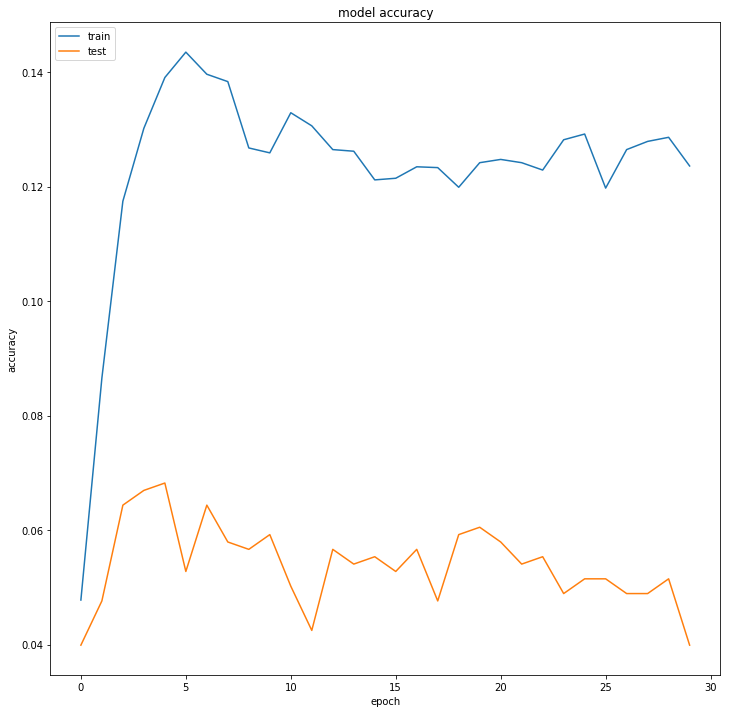

<Figure size 432x288 with 0 Axes>

0.0682110682110682


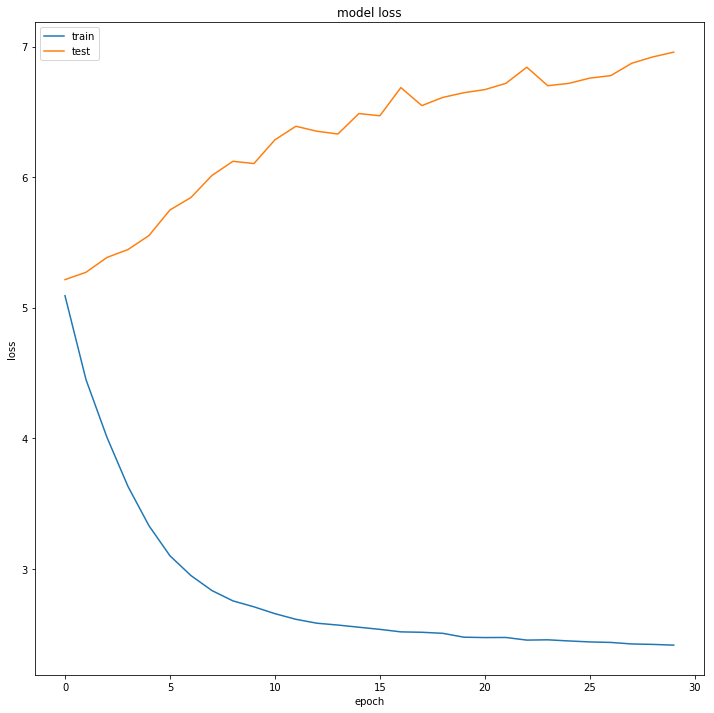

<Figure size 432x288 with 0 Axes>

In [36]:
# summarize history for accuracy
plt.figure(figsize=(12,12))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
fig = plt.figure()
fig.savefig('accuracy_graph_' + composition_type + '_dropout_' + str(int(dropout_value*100)) + '_epochs_' + str(nr_epochs) + '.png')
plt.show()
plt.close(fig)
print(max(history.history['val_acc']))
# with open('max_val_acc_for_' + composition_type + '_dropout_' + str(int(dropout_value*100)) + '_epochs_' + str(nr_epochs) + '.txt', 'w') as max_val_file:
#     max_val_file.write('Maximum validation accuracy: ' + str(max(history.history['val_acc'])))

# summarize history for loss
plt.figure(figsize=(12,12))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
fig = plt.figure()
fig.savefig('loss_graph_' + composition_type + '_dropout_' + str(int(dropout_value*100)) + '_epochs_' + str(nr_epochs) + '.png')
plt.show()
plt.close(fig)

In [52]:
print('a test question:', ' '.join([vocab[wid] for sent in X_test[0][1:2] for wid in sent if wid != 0]))
print('the dataset answer:', ' '.join([answers[wid] for wid in Y_test[1:2] ]))
print('the predicted answer:', answers[np.argmax(model.predict([X_test[0][1:2], X_test[1][1:2]]), 1)[0]])
print('image:', [image_name.strip() for image_name in open('data/daquar/qa.894.raw.test.format_triple.contexts')][1])

a test question: what is on the left side of the fire extinguisher and on the right side of the chair ?
the dataset answer: table
the predicted answer: door
image: image1


![](data/daquar/images/image1.png)

In [ ]:
results = np.argmax(model.predict(X_test), 1)
predicted_answer_list = []
for i in range(0,6561):
    ansvar = answers[results[i]]
    predicted_answer_list.append(ansvar)
# print (predicted_answer_list)
print (len(predicted_answer_list))


def most_common(lst):
    return max(set(lst), key=lst.count)

most_common_answer = most_common(predicted_answer_list)
print(most_common_answer)
print(predicted_answer_list.count(most_common_answer))

In [ ]:
X_test[0][10]

In [ ]:
index2sent = lambda x: ' '.join([vocab[wid] for wid in x if wid != 0])
index2sent(X_test[0][9]), answers[Y_test[9]], answers[results[9]]

![](data/daquar/images/image2.png)

In [ ]:
! head -120 data/daquar/qa.894.raw.test.format_triple 

In [34]:
# Network with attention

dropout_value = 0.3
embedding_output_dim = 300
#choose what composition type will be used
composition_1 = "comp1"
composition_2 = "comp1"

input_question = Input([question_len+1,])
# print(input_question.shape)
print(type(input_question))
input_context = Input([7*7*2048,])
print (input_context.shape)
# learn embedings (size=300 as we chose just now :D)
q_embs = Embedding(len(vocab), embedding_output_dim)(input_question)


v_reshaped = Lambda(lambda x: K.reshape(x, [-1, 7, 7, 2048]))([input_context])

# encode the question
q_encoded = LSTM(embedding_output_dim, return_sequences=False)(q_embs)
print (q_encoded.shape)
print(type(q_encoded))


vis_and_text = cross_modal_comp1(v_reshaped, q_encoded)

print (vis_and_text.shape)

#attention
comp = Flatten()(vis_and_text)
print (comp.shape)
alpha = Dense(49, activation='softmax')(comp)
print (alpha.shape)
alpha = Reshape([7,7,1])(alpha)
print (alpha.shape)

ski_mask = Lambda(lambda x: x[0] * x[1])([v_reshaped, alpha])

print(ski_mask.shape)
vis_and_text2 = cross_modal_comp1(ski_mask, q_encoded)
print('shape of vis and text2')
print(vis_and_text2.shape)

comp2 = Flatten()(vis_and_text2)
mlp_2 = Dropout(dropout_value)(Dense(visual_vec_len, activation='relu')(comp2))
print(mlp_2.shape)
print(len(answers))
final_a = Dense(len(answers), activation='softmax')(mlp_2)
print(final_a.shape)
model = Model([input_question, input_context], final_a)
# model = Model(inputs = (input_question, input_context), outputs = final_a)
model.summary()

<class 'tensorflow.python.framework.ops.Tensor'>
(?, 100352)
(?, 300)
<class 'tensorflow.python.framework.ops.Tensor'>
(?, 7, 7, 2348)
(?, ?)
(?, 49)
(?, 7, 7, 1)
(?, 7, 7, 2048)
shape of vis and text2
(?, 7, 7, 2348)
(?, 2048)
500
(?, 500)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 29)           0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 100352)       0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 29, 300)      263700      input_1[0][0]                    
__________________________________________________________________

#Train the model

In [35]:
# what is the loss, and how the parameters should be updated:
model.compile('adam', 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [36]:
from keras.utils import plot_model
plot_model(model, to_file='barzagli_attention_model_graph_' + 'composition_one_' + composition_1 + '_composition_two_' + composition_2 +'.png', show_shapes=True)

In [37]:
nr_epochs = 30
history = model.fit(X_train, Y_train, epochs=nr_epochs, batch_size=32, validation_split=0.1)
scores = model.evaluate(X_test, Y_test)
print (model.metrics_names)
# print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Train on 6991 samples, validate on 777 samples
Epoch 1/30
6991/6991 [==============================] - 55s 8ms/step - loss: 5.1194 - acc: 0.0935 - val_loss: 4.9631 - val_acc: 0.0682
Epoch 2/30
6991/6991 [==============================] - 38s 5ms/step - loss: 4.0972 - acc: 0.1704 - val_loss: 4.8273 - val_acc: 0.1042
Epoch 3/30
6991/6991 [==============================] - 38s 5ms/step - loss: 3.6112 - acc: 0.2167 - val_loss: 4.8594 - val_acc: 0.1133
Epoch 4/30
6991/6991 [==============================] - 38s 5ms/step - loss: 3.2043 - acc: 0.2661 - val_loss: 4.9670 - val_acc: 0.1313
Epoch 5/30
6991/6991 [==============================] - 37s 5ms/step - loss: 2.8982 - acc: 0.3051 - val_loss: 5.1715 - val_acc: 0.1326
Epoch 6/30
6991/6991 [==============================] - 38s 5ms/step - loss: 2.6604 - acc: 0.3383 - val_loss: 5.4338 - val_acc: 0.1248
Epoch 7/30
6991/6991 [==============================] - 38s 5ms/step - loss: 2.3743 - acc: 0.3791 - val_loss: 5.5233 - val_acc: 0.1429
Epoch 8/

In [38]:
# model.save('attention_model_' + 'composition_one_' + composition_1 + '_composition_two_' + composition_2 + '_dropout_' + str(int(dropout_value*100)) + '_epochs_' + str(nr_epochs) + '.h5')
# #model = load_model('my_model.h5')

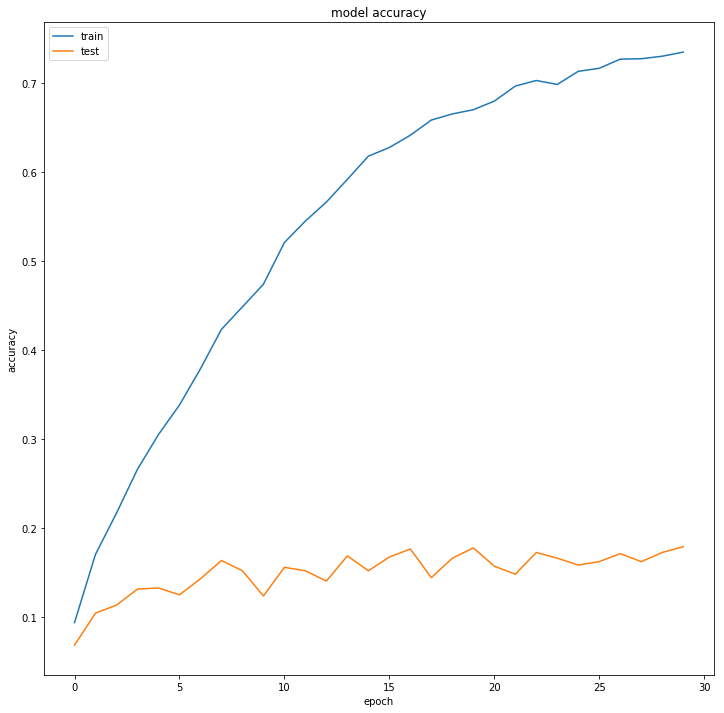

<Figure size 432x288 with 0 Axes>

0.1788931789027678


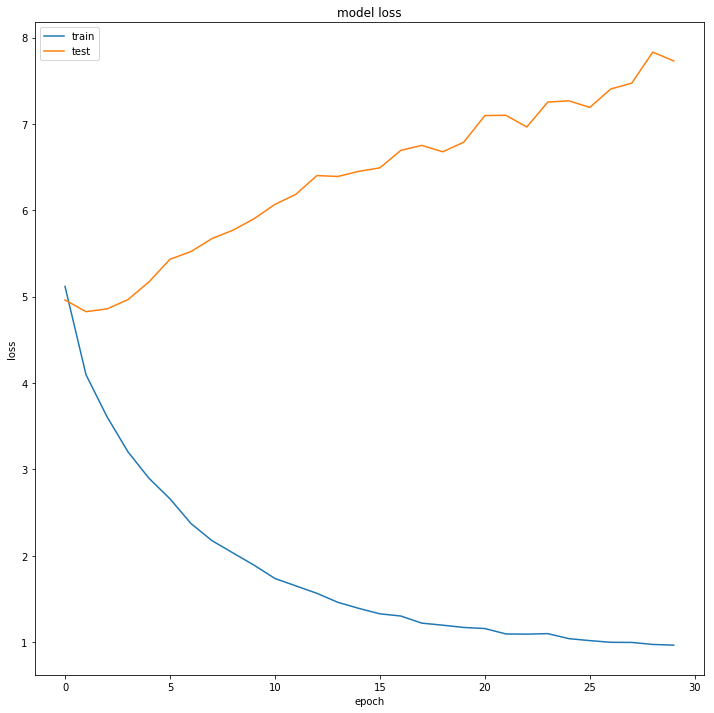

<Figure size 432x288 with 0 Axes>

In [39]:
# summarize history for accuracy
plt.figure(figsize=(12,12))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
fig = plt.figure()
fig.savefig('barzagli_attention_accuracy_graph_' + 'composition_one_' + composition_1 + '_composition_two_' + composition_2 + '_dropout_' + str(int(dropout_value*100)) + '_epochs_' + str(nr_epochs) + '.png')
plt.show()
plt.close(fig)
print(max(history.history['val_acc']))
# with open('attention_max_val_acc_for_' + 'composition_one_' + composition_1 + '_composition_two_' + composition_2 + '_dropout_' + str(int(dropout_value*100)) + '_epochs_' + str(nr_epochs) + '.txt', 'w') as max_val_file:
#     max_val_file.write('Maximum validation accuracy: ' + str(max(history.history['val_acc'])))

# summarize history for loss
plt.figure(figsize=(12,12))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
fig = plt.figure()
fig.savefig('barzagli_attention_loss_graph_' + 'composition_one_' + composition_1 + '_composition_two_' + composition_2 + '_dropout_' + str(int(dropout_value*100)) + '_epochs_' + str(nr_epochs) + '.png')
plt.show()
plt.close(fig)

In [40]:
print('a test question:', ' '.join([vocab[wid] for sent in X_test[0][1:2] for wid in sent if wid != 0]))
print('the dataset answer:', ' '.join([answers[wid] for wid in Y_test[1:2] ]))
print('the predicted answer:', answers[np.argmax(model.predict([X_test[0][1:2], X_test[1][1:2]]), 1)[0]])
print('image:', [image_name.strip() for image_name in open('data/daquar/qa.894.raw.test.format_triple.contexts')][1])

a test question: what is on the left side of the fire extinguisher and on the right side of the chair ?
the dataset answer: table
the predicted answer: wall_divider
image: image1


In [ ]:
results = np.argmax(model.predict(X_test), 1)

In [ ]:
X_test[0][10]

In [ ]:
index2sent = lambda x: ' '.join([vocab[wid] for wid in x if wid != 0])
index2sent(X_test[0][9]), answers[Y_test[9]], answers[results[9]]

In [122]:
# Trying to build a working attention network
input_question = Input([question_len+1,])
# print(input_question.shape)
print(type(input_question))
input_context = Input([7*7*2048,])
print (input_context.shape)
# learn embedings (size=300 as we chose just now :D)
q_embs = Embedding(len(vocab), 300)(input_question)


v_reshaped = Lambda(lambda x: K.reshape(x, [-1, 7, 7, 2048]))([input_context])

vis_vec = Flatten()(AveragePooling2D([7,7])(Reshape([7,7,2048])(input_context)))

print (v_reshaped.shape)
# encode the question
q_encoded = LSTM(300, return_sequences=False)(q_embs)
print (q_encoded.shape)
print(type(q_encoded))
#cross modal composition


vis_and_text = cross_modal_comp0(vis_vec, q_encoded)
print(vis_and_text.shape)

#attention
# comp = Flatten()(vis_and_text)
# print (comp.shape)
alpha = Dense(49, activation='softmax')(vis_and_text)
print (alpha.shape)
alpha = Reshape([7,7,1])(alpha)
print (alpha.shape)

ski_mask = Lambda(lambda x: x[0] * x[1])([v_reshaped, alpha])

print(ski_mask.shape)

vis_vec2 = Flatten()(AveragePooling2D([7,7])(ski_mask))

vis_and_text2 = cross_modal_comp0(vis_vec2, q_encoded)
                    
                     
# vis_and_text2 = cross_modal_comp0(ski_mask, q_encoded)
print('shape of vis and text2')
print(vis_and_text2.shape)

# comp2 = Flatten()(vis_and_text2)
# mlp_2 = Dropout(0.5)(Dense(visual_vec_len, activation='relu')(vis_and_text2))
mlp_2 = Dropout(0.5)(Dense(visual_vec_len, activation='relu')(vis_and_text2))
print(mlp_2.shape)
print(len(answers))
final_a = Dense(len(answers), activation='softmax')(mlp_2)
print(final_a.shape)
model = Model([input_question, input_context], final_a)
# model = Model(inputs = (input_question, input_context), outputs = final_a)
model.summary()

<class 'tensorflow.python.framework.ops.Tensor'>
(?, 100352)
(?, 7, 7, 2048)
(?, 300)
<class 'tensorflow.python.framework.ops.Tensor'>
(?, 2348)
(?, 49)
(?, 7, 7, 1)
(?, 7, 7, 2048)
shape of vis and text2
(?, 2348)
(?, 2048)
500
(?, 500)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_44 (InputLayer)           (None, 100352)       0                                            
__________________________________________________________________________________________________
reshape_35 (Reshape)            (None, 7, 7, 2048)   0           input_44[0][0]                   
__________________________________________________________________________________________________
input_43 (InputLayer)           (None, 29)           0                                            
_____________________________________________________________________

In [123]:
#Train the model

In [124]:
# what is the loss, and how the parameters should be updated:
model.compile('adam', 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [125]:
history = model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_split=0.1)
scores = model.evaluate(X_test, Y_test)
print (model.metrics_names)
# print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Train on 6991 samples, validate on 777 samples
Epoch 1/30
6991/6991 [==============================] - 24s 3ms/step - loss: 4.7958 - acc: 0.0754 - val_loss: 4.8444 - val_acc: 0.0772
Epoch 2/30
6991/6991 [==============================] - 21s 3ms/step - loss: 3.9288 - acc: 0.1619 - val_loss: 4.6386 - val_acc: 0.1197
Epoch 3/30
6991/6991 [==============================] - 21s 3ms/step - loss: 3.4364 - acc: 0.2229 - val_loss: 4.4795 - val_acc: 0.1725
Epoch 4/30
6991/6991 [==============================] - 21s 3ms/step - loss: 2.9954 - acc: 0.2857 - val_loss: 4.5466 - val_acc: 0.1853
Epoch 5/30
6991/6991 [==============================] - 21s 3ms/step - loss: 2.6135 - acc: 0.3370 - val_loss: 4.5139 - val_acc: 0.1866
Epoch 6/30
6991/6991 [==============================] - 21s 3ms/step - loss: 2.2581 - acc: 0.4021 - val_loss: 4.5310 - val_acc: 0.1918
Epoch 7/30
6991/6991 [==============================] - 20s 3ms/step - loss: 1.9395 - acc: 0.4533 - val_loss: 4.8050 - val_acc: 0.1686
Epoch 8/

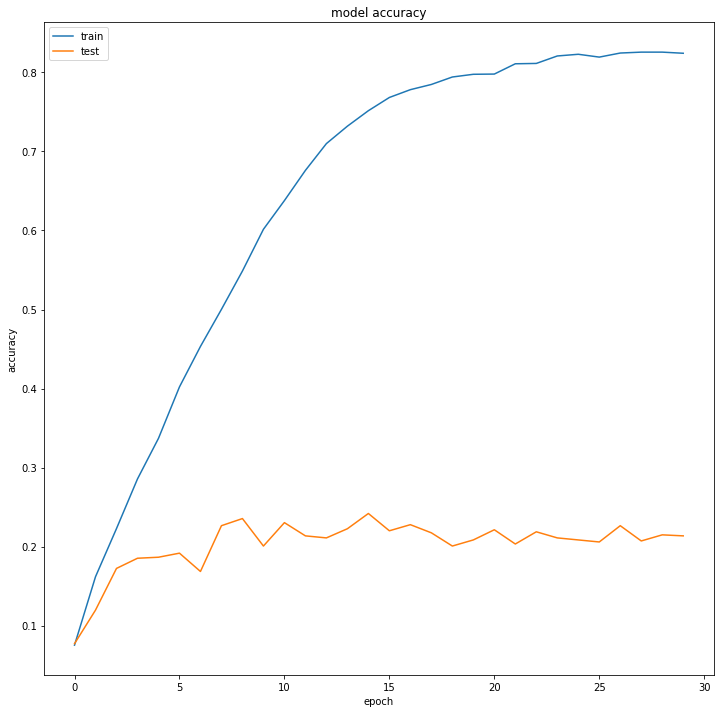

<Figure size 432x288 with 0 Axes>

0.24195624197541976


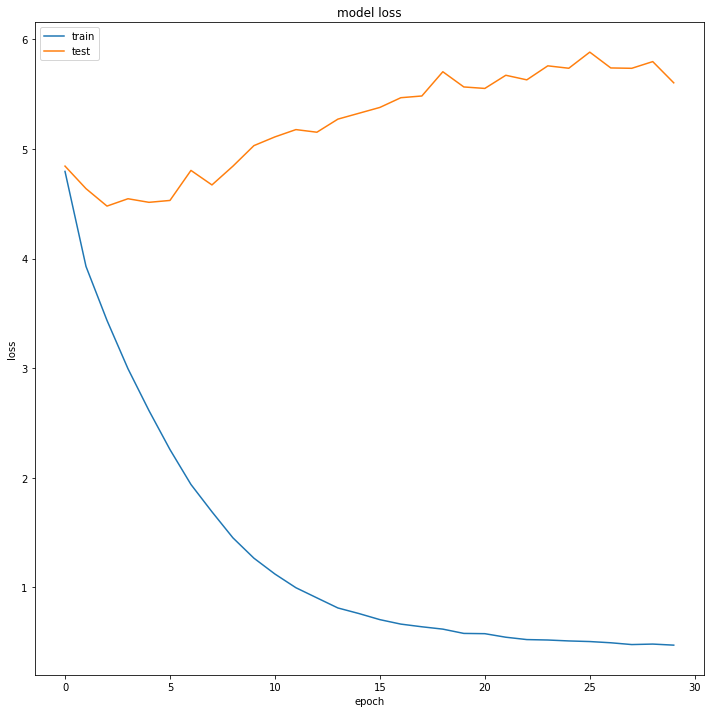

<Figure size 432x288 with 0 Axes>

In [126]:
# summarize history for accuracy
plt.figure(figsize=(12,12))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
fig = plt.figure()
fig.savefig('barzagli_attention_accuracy_graph_' + 'composition_one_' + composition_1 + '_composition_two_' + composition_2 + '_dropout_' + str(int(dropout_value*100)) + '_epochs_' + str(nr_epochs) + '.png')
plt.show()
plt.close(fig)
print(max(history.history['val_acc']))
# with open('attention_max_val_acc_for_' + 'composition_one_' + composition_1 + '_composition_two_' + composition_2 + '_dropout_' + str(int(dropout_value*100)) + '_epochs_' + str(nr_epochs) + '.txt', 'w') as max_val_file:
#     max_val_file.write('Maximum validation accuracy: ' + str(max(history.history['val_acc'])))

# summarize history for loss
plt.figure(figsize=(12,12))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
fig = plt.figure()
fig.savefig('barzagli_attention_loss_graph_' + 'composition_one_' + composition_1 + '_composition_two_' + composition_2 + '_dropout_' + str(int(dropout_value*100)) + '_epochs_' + str(nr_epochs) + '.png')
plt.show()

In [96]:
print('a test question:', ' '.join([vocab[wid] for sent in X_test[0][1:2] for wid in sent if wid != 0]))
print('the dataset answer:', ' '.join([answers[wid] for wid in Y_test[1:2] ]))
print('the predicted answer:', answers[np.argmax(model.predict([X_test[0][1:2], X_test[1][1:2]]), 1)[0]])
print('image:', [image_name.strip() for image_name in open('data/daquar/qa.894.raw.test.format_triple.contexts')][1])

a test question: what is on the left side of the fire extinguisher and on the right side of the chair ?
the dataset answer: table
the predicted answer: toy
image: image1


In [ ]:
results = np.argmax(model.predict(X_test), 1)

In [ ]:
X_test[0][10]

In [ ]:
index2sent = lambda x: ' '.join([vocab[wid] for wid in x if wid != 0])
index2sent(X_test[0][9]), answers[Y_test[9]], answers[results[9]]

Another model

In [ ]:
# # Trying to build a working attention network
# input_question = Input([question_len+1,])
# # print(input_question.shape)
# print(type(input_question))
# input_context = Input([7*7*2048,])
# print (input_context.shape)
# # learn embedings (size=50 as we chose just now :D)
# q_embs = Embedding(len(vocab), 50)(input_question)


# v_reshaped = Lambda(lambda x: K.reshape(x, [-1, 7, 7, 2048]))([input_context])

# # encode the question
# q_encoded = LSTM(50, return_sequences=False)(q_embs)
# print (q_encoded.shape)
# print(type(q_encoded))
# #cross modal composition

# vis_and_text = cross_modal_comp2(v_reshaped, q_encoded)
# print(vis_and_text.shape)

# #attention
# # comp = Flatten()(vis_and_text)
# # print (comp.shape)
# alpha = Dense(49, activation='softmax')(vis_and_text)
# print (alpha.shape)
# alpha = Reshape([7,7,1])(alpha)
# print (alpha.shape)

# ski_mask = Lambda(lambda x: x[0] * x[1])([v_reshaped, alpha])

# print(ski_mask.shape)
# vis_and_text2 = cross_modal_comp1(ski_mask, q_encoded)
# print('shape of vis and text2')
# print(vis_and_text2.shape)

# comp2 = Flatten()(vis_and_text2)
# # mlp_2 = Dropout(0.5)(Dense(visual_vec_len, activation='relu')(vis_and_text2))
# mlp_2 = Dropout(0.5)(Dense(visual_vec_len, activation='relu')(comp2))
# print(mlp_2.shape)
# print(len(answers))
# final_a = Dense(len(answers), activation='softmax')(mlp_2)
# print(final_a.shape)
# model = Model([input_question, input_context], final_a)
# # model = Model(inputs = (input_question, input_context), outputs = final_a)
# model.summary()

In [ ]:
# # what is the loss, and how the parameters should be updated:
# model.compile('adam', 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# model.fit(X_train, Y_train, epochs=1, batch_size=32, validation_split=0.1)
# scores = model.evaluate(X_test, Y_test)
# print (model.metrics_names)
# # print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# Discussions

In [ ]:
# the goal is come with discussions about what can be done better than what we have in this model.